## Features like

1. q1_len = char len of q1
2. q2_len = char len of q2
3. q1_words = no. of words in q1
4. q2_words = no. of words in q2
5. words_common = no. of common unique words
6. words_total = total no of words in q1 + total no of words in q2
7. words_share = words_common / words_total

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("train.csv")

In [35]:
df.shape

(404290, 6)

In [36]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [37]:
new_df = df.sample(30000,random_state=42)

In [38]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [39]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [40]:
new_df.duplicated().sum()

0

is_duplicate
0    18947
1    11053
Name: count, dtype: int64
is_duplicate
0    63.156667
1    36.843333
Name: count, dtype: float64


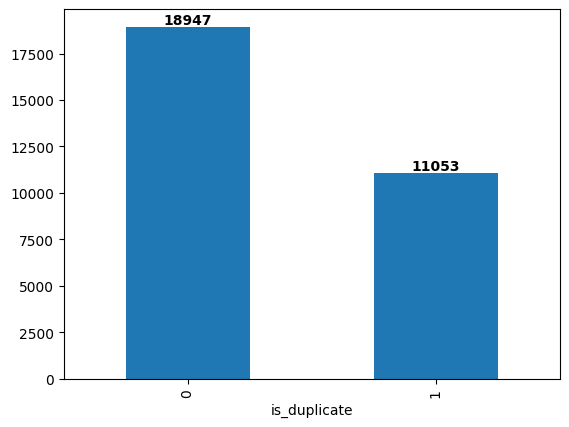

In [41]:
# Distribution of duplicate and non-duplicate questions
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind="bar")
for i, value in enumerate(new_df['is_duplicate'].value_counts()):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold')

In [42]:
# Repeated Questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions---->',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of repeated questions-->',x[x].shape[0])

Number of unique questions----> 55464
Number of repeated questions--> 3372


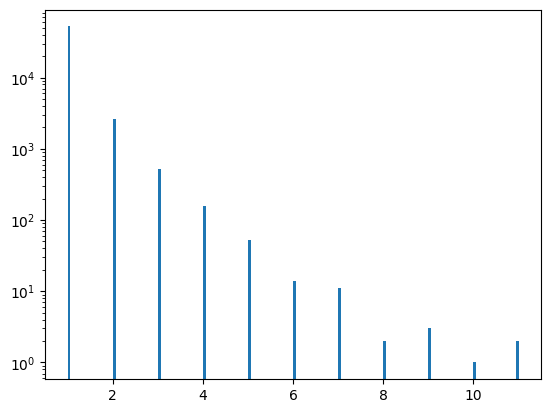

In [43]:
# Repeated Questions Histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

## Feature Engineering

In [44]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [45]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29


In [46]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7


In [47]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [48]:
new_df['words_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3


In [49]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [50]:
new_df['words_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16


In [51]:
new_df['words_share'] = round(new_df['words_common']/new_df['words_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,words_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20,0.30
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24,0.08
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16,0.25
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16,0.19


minimum characters----> 1
maximum characters----> 334
average number of characters--> 59


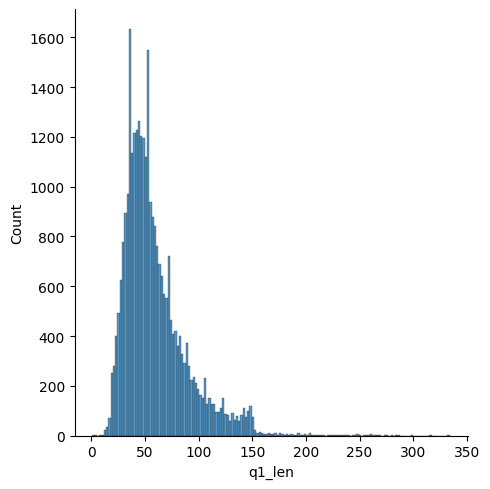

In [54]:
# Feature Analysis
sns.displot(new_df['q1_len'])
print('minimum characters---->', new_df["q1_len"].min())
print('maximum characters---->', new_df["q1_len"].max())
print('average number of characters-->', int(new_df["q1_len"].mean()))

minimum characters----> 1
maximum characters----> 1169
average number of characters--> 59


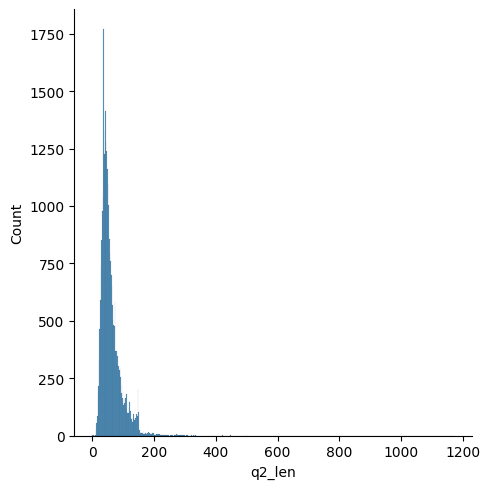

In [55]:
sns.displot(new_df['q2_len'])
print('minimum characters---->', new_df["q2_len"].min())
print('maximum characters---->', new_df["q2_len"].max())
print('average number of characters-->', int(new_df["q2_len"].mean()))

minimum characters----> 1
maximum characters----> 67
average number of characters--> 10


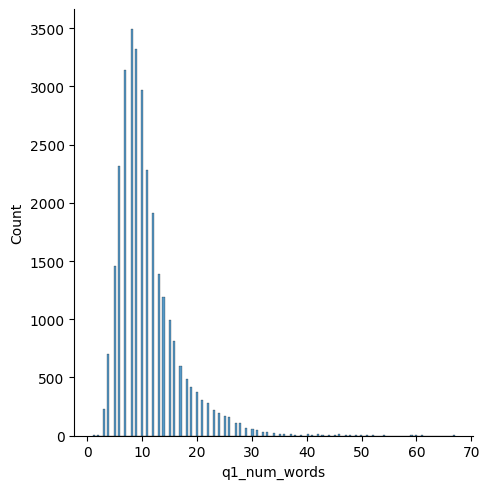

In [56]:
sns.displot(new_df['q1_num_words'])
print('minimum characters---->', new_df["q1_num_words"].min())
print('maximum characters---->', new_df["q1_num_words"].max())
print('average number of characters-->', int(new_df["q1_num_words"].mean()))

minimum characters----> 1
maximum characters----> 228
average number of characters--> 11


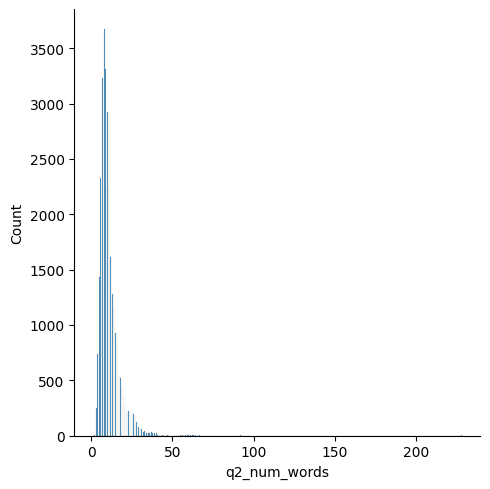

In [57]:
sns.displot(new_df['q2_num_words'])
print('minimum characters---->', new_df["q2_num_words"].min())
print('maximum characters---->', new_df["q2_num_words"].max())
print('average number of characters-->', int(new_df["q2_num_words"].mean()))

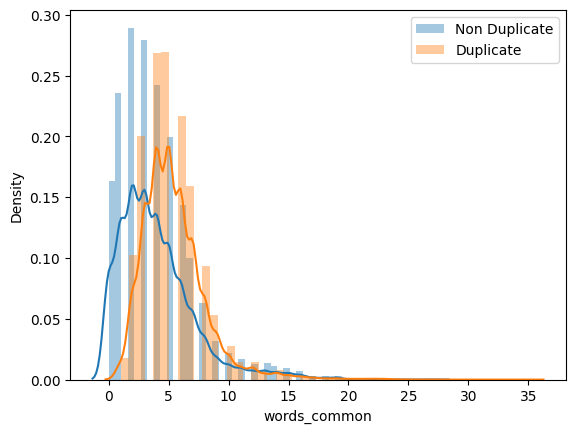

In [60]:
# Common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]["words_common"],label = "Non Duplicate")
sns.distplot(new_df[new_df['is_duplicate'] == 1]["words_common"],label = "Duplicate")
plt.legend()
plt.show()

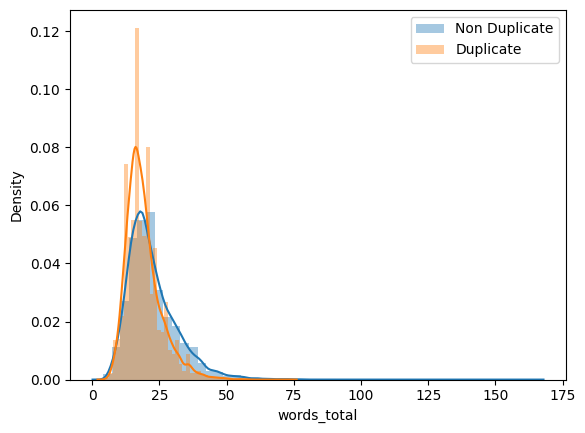

In [61]:
# Total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]["words_total"],label = "Non Duplicate")
sns.distplot(new_df[new_df['is_duplicate'] == 1]["words_total"],label = "Duplicate")
plt.legend()
plt.show()

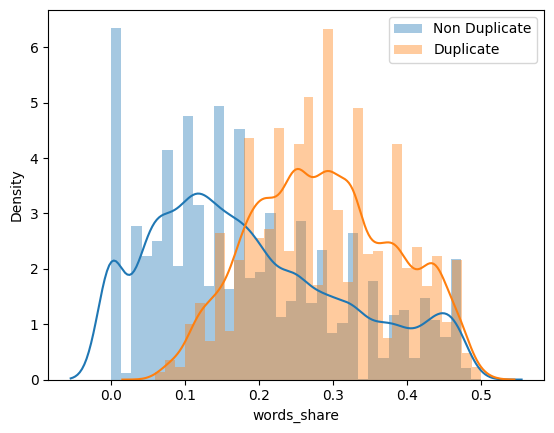

In [62]:
# Common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]["words_share"],label = "Non Duplicate")
sns.distplot(new_df[new_df['is_duplicate'] == 1]["words_share"],label = "Duplicate")
plt.legend()
plt.show()

In [64]:
ques_df = new_df[["question1","question2"]]
ques_df

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...
73186,How close we are to see 3rd world war?,How close is a World War III?
...,...,...
81275,Who blocked me on Viber?,What can I do when someone blocked me on Viber?
273382,Who are the most underrated actors and actress...,Who is Bollywood's most underrated actor?
142371,How do I start learning c language?,How should I start to learn c language?
79120,What is it like flying from Bangkok to Manila ...,What is it like flying from Bangkok to Manila ...


In [65]:
final_df = new_df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,words_share
8067,0,34,34,8,8,7,16,0.44
368101,0,53,51,11,9,6,20,0.30
70497,0,96,45,16,8,2,24,0.08
226567,1,44,52,7,9,4,16,0.25
73186,1,38,29,9,7,3,16,0.19


In [66]:
# Implementing bag-of-words
from sklearn.feature_extraction.text import CountVectorizer

# merge texts
questions = list(ques_df["question1"]) + list(ques_df["question2"])
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [67]:
temp_df1 = pd.DataFrame(q1_arr,index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2], axis = 1)
temp_df.shape

(30000, 6000)

In [68]:
final_df = pd.concat([final_df,temp_df], axis = 1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,words_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,34,34,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,53,51,11,9,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,96,45,16,8,2,24,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,1,44,52,7,9,4,16,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,1,38,29,9,7,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7793333333333333

In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7773333333333333

# Advance features that need to be added

## 1. Token Features
cwc_min: This is the ratio of the number of common words to the length of the smaller question.

cwc_max: This is the ratio of the number of common words to the length of the larger question.

csc_min. This is the ratio of the number of common stop words to the smaller stop word count among the two questions.

csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions.

ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions.

ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions.

last_word_eq: 1 if the last word in the two questions is same, 0 otherwise.

first_word_eq: 1 if the first word in the two questions is same, 0 otherwise.

## 2. Length Based Features
mean_len: Mean of the length of the two questions (number of words).

abs_len_diff: Absolute difference between the length of the two questions (number of words).

longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question.


## 3. Fuzzy Features
fuzz_ratio: fuzz_ratio score from fuzzywuzzy.

fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy.

token_sort ratio: token_sort_ratio from fuzzywuzzy.

token_set_ratio: token_set_ratio from fuzzywuzzy.